<a href="https://colab.research.google.com/github/alooperalta/HamoyePythonQuiz1/blob/main/Time_Series_Household_Electric_Power_Consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
import scipy.stats
from scipy.stats import pearsonr
from fbprophet import Prophet

In [2]:
df = pd.read_csv('./data/household_power_consumption.txt', sep = ';', header=0,
                 low_memory=False, infer_datetime_format=True,
                 parse_dates={'datetime':[0,1]}, index_col=['datetime']) ## the date and time were parsed and turned to an index_col

In [3]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [4]:
df = df.replace('?', 'nan')
df = df.astype('float32')

In [5]:
df.isna().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [6]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091631e+00,1.237042e-01,2.433813e+02,4.629239e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057005e+00,1.128308e-01,4.114049e+00,4.440444e+00,6.104221e+00,5.758089e+00,8.458705e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [7]:
df = df.fillna(df.mean())

In [8]:
df_daily = df.resample('D').sum()
df_daily.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16,1209.176025,34.922001,93552.53125,5180.799805,0.0,546.0,4926.0
2006-12-17,3390.459961,226.005997,345725.31250,14398.599609,2033.0,4187.0,13341.0
2006-12-18,2203.825928,161.792007,347373.62500,9247.200195,1063.0,2621.0,14018.0
2006-12-19,1666.193970,150.942001,348479.00000,7094.000000,839.0,7602.0,6197.0
2006-12-20,2225.748047,160.998001,348923.62500,9313.000000,0.0,2648.0,14063.0


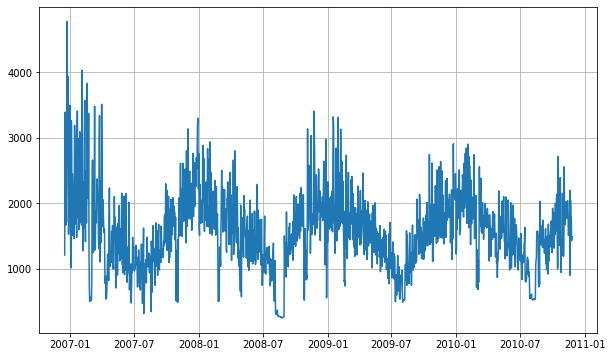

In [9]:
plt.figure(figsize=(10,6))
plt.plot(df_daily.index, df_daily.Global_active_power )
plt.grid()

In [10]:
corr2,_ = pearsonr(df_daily.Voltage,df_daily.Global_intensity)
corr2

0.05221350712869458

In [11]:
train_data = df_daily.iloc[:1077,:]


In [12]:
test_data = df_daily.iloc[1077:,:]

In [13]:
train_data = train_data.reset_index()
train_data.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,1209.176025,34.922001,93552.53125,5180.799805,0.0,546.0,4926.0
1,2006-12-17,3390.459961,226.005997,345725.31250,14398.599609,2033.0,4187.0,13341.0
2,2006-12-18,2203.825928,161.792007,347373.62500,9247.200195,1063.0,2621.0,14018.0
3,2006-12-19,1666.193970,150.942001,348479.00000,7094.000000,839.0,7602.0,6197.0
4,2006-12-20,2225.748047,160.998001,348923.62500,9313.000000,0.0,2648.0,14063.0


In [14]:
df_train = train_data.iloc[:,:2]

In [15]:
df_train = df_train.rename(columns={"datetime": "ds", "Global_active_power": "y"})
df_train.head()

,ds,y
0,2006-12-16,1209.176025
1,2006-12-17,3390.459961
2,2006-12-18,2203.825928
3,2006-12-19,1666.193970
4,2006-12-20,2225.748047


In [16]:
test_data = test_data.reset_index()
test_data.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2009-11-27,1380.026001,133.052002,348276.68750,5704.000000,0.0,396.0,11599.0
1,2009-11-28,1858.949951,225.218002,347898.87500,7784.799805,3199.0,386.0,14350.0
2,2009-11-29,1650.962036,191.056000,350364.56250,6878.399902,1073.0,3061.0,7828.0
3,2009-11-30,1745.189941,153.382004,351020.59375,7232.200195,1080.0,361.0,12039.0
4,2009-12-01,1756.378052,141.873993,349391.75000,7312.799805,0.0,354.0,10821.0


In [17]:
df_tests = test_data.iloc[:,:2]

In [18]:
df_tests = df_tests.rename(columns={"datetime": "ds", "Global_active_power": "y"})
df_tests.head()

,ds,y
0,2009-11-27,1380.026001
1,2009-11-28,1858.949951
2,2009-11-29,1650.962036
3,2009-11-30,1745.189941
4,2009-12-01,1756.378052


In [19]:
model = Prophet()
model.fit(df_train)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [20]:
forecast = model.predict(df_tests) 
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2009-11-27,1580.084009,1530.422498,2631.268290,1580.084009,1580.084009,519.056899,519.056899,519.056899,-64.127019,-64.127019,-64.127019,583.183918,583.183918,583.183918,0.0,0.0,0.0,2099.140908
1,2009-11-28,1580.207768,1807.989349,2971.942297,1580.207768,1580.207768,822.213567,822.213567,822.213567,245.813256,245.813256,245.813256,576.400311,576.400311,576.400311,0.0,0.0,0.0,2402.421335
2,2009-11-29,1580.331526,1844.991811,2931.012261,1580.331526,1580.331526,796.157722,796.157722,796.157722,228.519177,228.519177,228.519177,567.638545,567.638545,567.638545,0.0,0.0,0.0,2376.489248
3,2009-11-30,1580.455285,1382.801138,2521.500909,1580.455285,1580.455285,396.118617,396.118617,396.118617,-161.286790,-161.286790,-161.286790,557.405408,557.405408,557.405408,0.0,0.0,0.0,1976.573902
4,2009-12-01,1580.579043,1510.434615,2630.399313,1580.579043,1580.579043,516.895388,516.895388,516.895388,-29.332428,-29.332428,-29.332428,546.227816,546.227816,546.227816,0.0,0.0,0.0,2097.474431


In [21]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']].head()

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2009-11-27,2099.140908,1530.422498,2631.268290,1580.084009,1580.084009,1580.084009
1,2009-11-28,2402.421335,1807.989349,2971.942297,1580.207768,1580.207768,1580.207768
2,2009-11-29,2376.489248,1844.991811,2931.012261,1580.331526,1580.331526,1580.331526
3,2009-11-30,1976.573902,1382.801138,2521.500909,1580.455285,1580.455285,1580.455285
4,2009-12-01,2097.474431,1510.434615,2630.399313,1580.579043,1580.579043,1580.579043


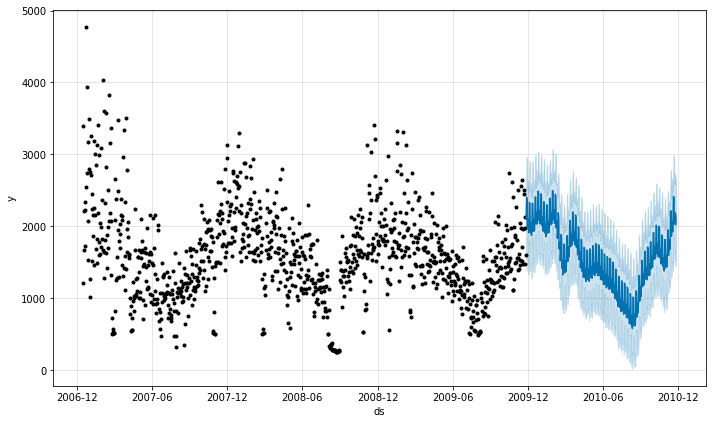

In [22]:
model.plot(forecast)
plt.show()

In [23]:
from sklearn import metrics

In [24]:
def Metric(y_true,y_pred):
  y_true,y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred)/y_true)) *100

In [25]:
MAPE = Metric(df_tests['y'],forecast['yhat'])
round(MAPE,2)

20.82

In [26]:
RMSE = np.sqrt(metrics.mean_squared_error(df_tests['y'],forecast['yhat']))
round(RMSE,4)

374.6042

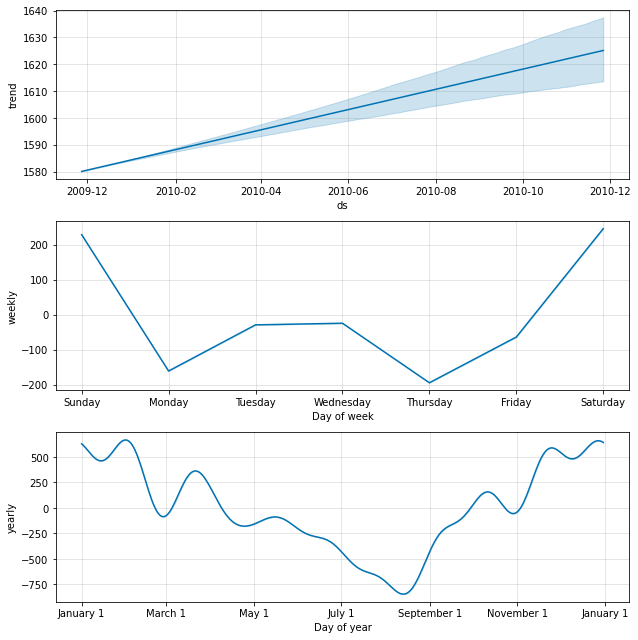

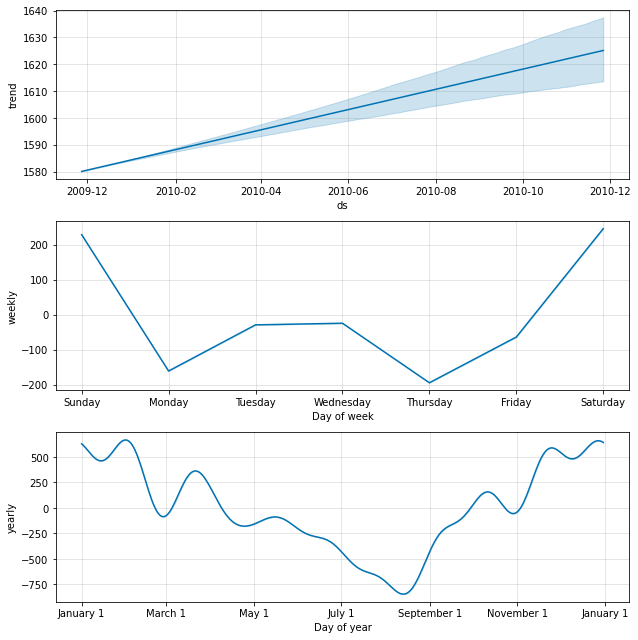

In [27]:
model.plot_components(forecast)

In [28]:
df_daily.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16,1209.176025,34.922001,93552.53125,5180.799805,0.0,546.0,4926.0
2006-12-17,3390.459961,226.005997,345725.31250,14398.599609,2033.0,4187.0,13341.0
2006-12-18,2203.825928,161.792007,347373.62500,9247.200195,1063.0,2621.0,14018.0
2006-12-19,1666.193970,150.942001,348479.00000,7094.000000,839.0,7602.0,6197.0
2006-12-20,2225.748047,160.998001,348923.62500,9313.000000,0.0,2648.0,14063.0


In [29]:
df_daily.shape

(1442, 7)

In [30]:
df_daily = df_daily.reset_index()

In [31]:
df_daily.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,1209.176025,34.922001,93552.53125,5180.799805,0.0,546.0,4926.0
1,2006-12-17,3390.459961,226.005997,345725.31250,14398.599609,2033.0,4187.0,13341.0
2,2006-12-18,2203.825928,161.792007,347373.62500,9247.200195,1063.0,2621.0,14018.0
3,2006-12-19,1666.193970,150.942001,348479.00000,7094.000000,839.0,7602.0,6197.0
4,2006-12-20,2225.748047,160.998001,348923.62500,9313.000000,0.0,2648.0,14063.0


In [32]:
New_df_daily = df_daily.rename(columns = {'datetime':'ds','Global_active_power':'y',
                                           'Global_reactive_power':'add1','Voltage':'add2',
                                           'Global_intensity':'add3','Sub_metering_1':'add4',
                                          'Sub_metering_2':'add5','Sub_metering_3':'add6'})

In [33]:
New_train = New_df_daily.iloc[:1077,:]
New_test = New_df_daily.iloc[1077:,:]
print(New_test.shape)
print(New_train.shape)

(365, 8)
(1077, 8)


In [34]:
model = Prophet()
model.add_regressor('add1')
model.add_regressor('add2')
model.add_regressor('add3')
model.add_regressor('add4')
model.add_regressor('add5')
model.add_regressor('add6')

In [35]:
model = model.fit(New_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [36]:
prediction = model.predict(New_test)

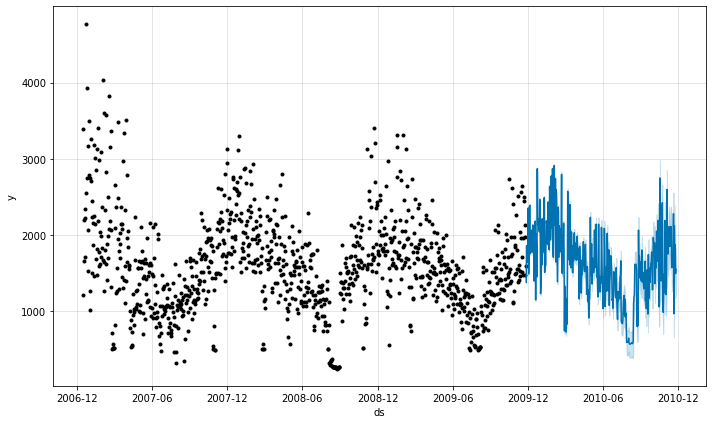

In [37]:
model.plot(prediction)
plt.show()

In [38]:
def Metric(y_true,y_pred):
  y_true,y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred)/y_true)) *100

In [39]:
MAPE = Metric(New_test['y'],prediction['yhat'])
round(MAPE,2)

3.04

In [40]:
RMSE = np.sqrt(metrics.mean_squared_error(New_test['y'],prediction['yhat']))
round(RMSE,4)

44.8791

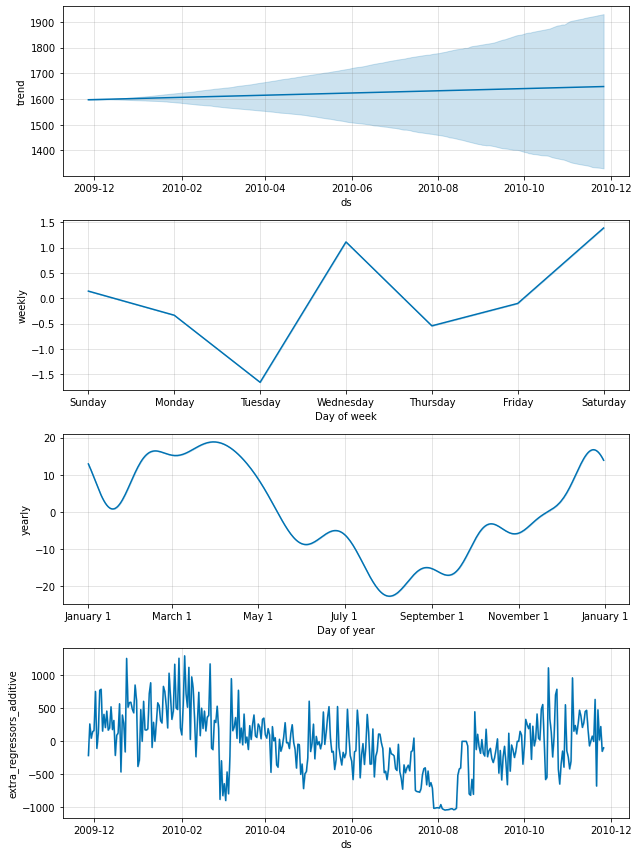

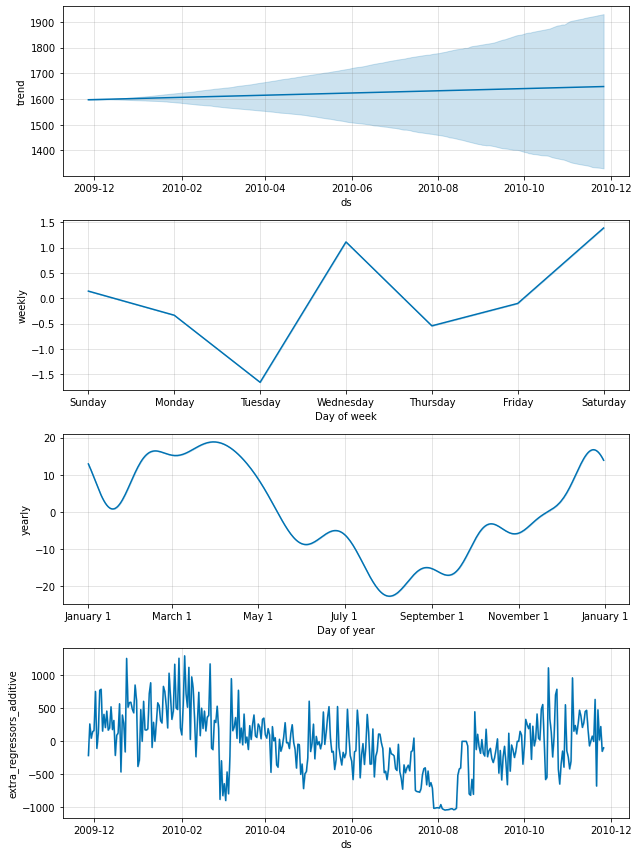

In [41]:
model.plot_components(prediction)